# Simple PCA example
To visualize its functionality and steps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.linalg import eigh

Definition of population parameters and sampling from normal distribution

In [2]:
mean = [3,3]
variance = [[6, 3],
            [3, 3.5]]
n = 100

(-10.0, 10.0)

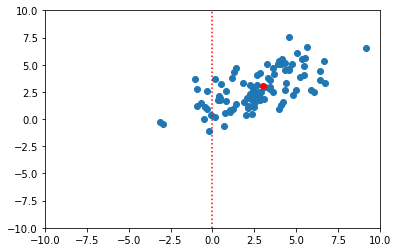

In [3]:
data_raw = np.random.multivariate_normal(mean, variance, 100)
plt.scatter(data_raw[:,0], data_raw[:,1])
plt.scatter([3,], [3,], color='red')
plt.vlines(x=0, ymin=-10, ymax=10, linestyle='dotted', color='red')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

## 1. Centering the data

(-10.0, 10.0)

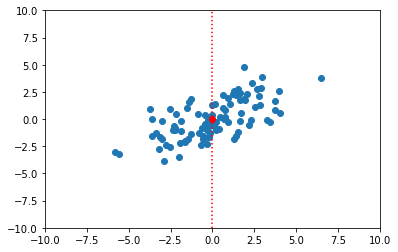

In [4]:
data_centered = data_raw - np.mean(data_raw, axis=0)

plt.scatter(data_centered[:,0], data_centered[:,1])
plt.scatter([0,], [0,], color='red')
plt.vlines(x=0, ymin=-10, ymax=10, linestyle='dotted', colors='red')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

## 2. Computing covariance matrix from sample

In [5]:
cov_mat = np.matmul(data_centered.T, data_centered)/(len(data_centered) - 1)
cov_mat

array([[4.79787701, 2.51094411],
       [2.51094411, 3.09966228]])

## 3. performing eigendecomposition of the covariance matrix

In [6]:
eigvals, eigvecs = eigh(cov_mat)
indices = eigvals.argsort()[::-1]
eigvals, eigvecs = eigvals[indices], eigvecs[:,indices]

In [7]:
eigvecs

array([[-0.8125091 ,  0.58294851],
       [-0.58294851, -0.8125091 ]])

## 4. Enforcing determinism by flipping signs

In [8]:
max_abs_cols = np.argmax(np.abs(eigvecs), axis=0)
signs = np.sign(eigvecs[max_abs_cols, range(eigvecs.shape[1])])
eigvecs = eigvecs*signs
eigvecs

array([[ 0.8125091 , -0.58294851],
       [ 0.58294851,  0.8125091 ]])

(-10.0, 10.0)

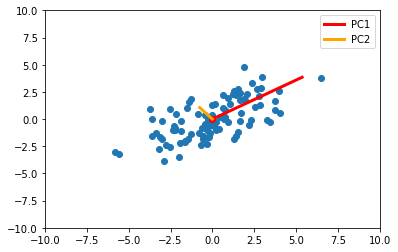

In [9]:
plt.scatter(data_centered[:,0], data_centered[:,1])
plt.scatter([0,], [0,], color='red')
plt.plot([0, eigvecs[0][0]*eigvals[0]], [0, eigvecs[1][0]*eigvals[0]], color='red', linewidth=3)
plt.plot([0, eigvecs[0][1]*eigvals[1]], [0, eigvecs[1][1]*eigvals[1]], color='orange', linewidth=3)
plt.legend(["PC1", "PC2"])
plt.xlim(-10, 10)
plt.ylim(-10, 10)

## 5. Computing PCs and visualizing new features
- Features are now uncorrelated 

(-10.0, 10.0)

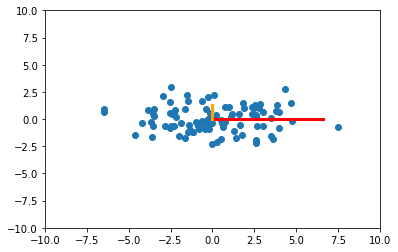

In [10]:
new_features = np.dot(data_centered, eigvecs)
plt.scatter(new_features[:,0], new_features[:,1])
plt.plot([0, 1*eigvals[0]], [0, 0*eigvals[0]], color='red', linewidth=3)
plt.plot([0, 0*eigvals[1]], [0, 1*eigvals[1]], color='orange', linewidth=3)

plt.xlim(-10, 10)
plt.ylim(-10, 10)


Validating that the new features have no covariance.

In [11]:
cov_mat = np.matmul(new_features.T, new_features)/(len(new_features) - 1)
cov_mat

array([[ 6.59939667e+00, -1.79429984e-16],
       [-1.79429984e-16,  1.29814262e+00]])

## 6. Visualizing the explained variance of each PC

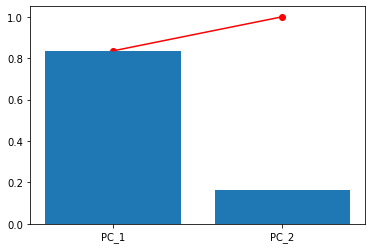

In [12]:
# Variance of each individual component as bars
plt.bar(
    [f"PC_{i}" for i in range(1,len(eigvals)+1)],
    eigvals/sum(eigvals)
)

# Percentage held by m components as the line
plt.plot(
    [f"PC_{i}" for i in range(1,len(eigvals)+1)],
    np.cumsum(eigvals)/sum(eigvals),
    color='red'
)
plt.scatter(
    [f"PC_{i}" for i in range(1,len(eigvals)+1)],
    np.cumsum(eigvals)/sum(eigvals),
    color='red'
)


## 7. Reducing dimensionality
By choosing only the first component

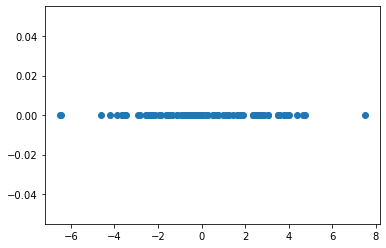

In [13]:
plt.scatter(new_features[:,0], [0]*len(new_features))

# PCA on Multi-class data
linearly separable

No handles with labels found to put in legend.


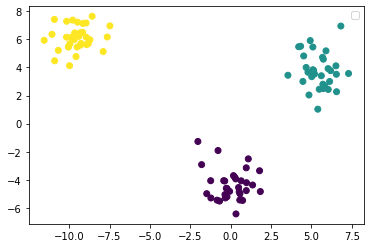

In [14]:
from sklearn.datasets import make_blobs
X, y = make_blobs()


plt.scatter(X[:,0], X[:,1],c=y)
plt.legend()
plt.show()

## Performing PCA steps

In [15]:
# Center Data
data_centered2 = X - np.mean(X, axis=0)
# Compute covariance
cov_mat2 = np.matmul(data_centered2.T, data_centered2)/(len(data_centered2) - 1)
# Compute eigenvalues and eigenvectors
eigvals, eigvecs = eigh(cov_mat2)
# Sort eigenvalues and eigenvectors
indices = eigvals.argsort()[::-1]
eigvals, eigvecs = eigvals[indices], eigvecs[:,indices]
# Enforce determinism by flipping signs
max_abs_cols = np.argmax(np.abs(eigvecs), axis=0)
signs = np.sign(eigvecs[max_abs_cols, range(eigvecs.shape[1])])
eigvecs = eigvecs*signs
# Compute new features
new_features = np.dot(data_centered2, eigvecs)



No handles with labels found to put in legend.


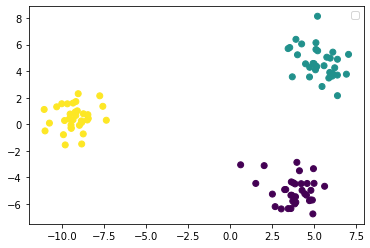

In [16]:
plt.scatter(new_features[:,0], new_features[:,1],c=y)
plt.legend()
plt.show()

## Visualizing the first component

No handles with labels found to put in legend.


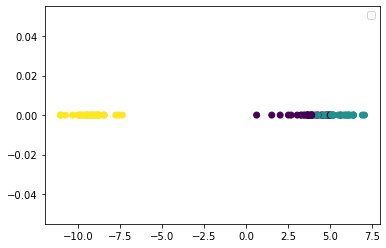

In [17]:
plt.scatter(new_features[:,0], [0]*len(new_features),c=y)
plt.legend()
plt.show()

# Testing our home-made PCA class

In [18]:
from pca import PCA

In [19]:
pca = PCA(2)
X_transformed = pca.fit_transform(X)

No handles with labels found to put in legend.


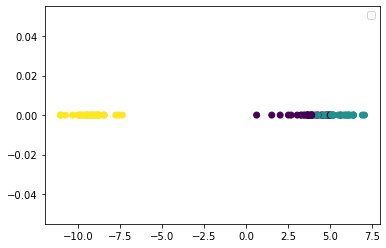

In [20]:
plt.scatter(X_transformed[:,0], [0]*len(X_transformed),c=y)
plt.legend()
plt.show()